<a href="https://colab.research.google.com/github/Naren8520/Python/blob/main/Predicci%C3%B3n_de_c%C3%A1ncer_mama_10%20model_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="imagen/cancer_mama.jpg" width="600" height="50"></center>

# <center> **Predicción del Cancer de Mama**
    

    
    - El cáncer de mama es el cáncer invasivo más común en las mujeres y la segunda causa principal de muerte por cáncer en las mujeres después del cáncer de pulmón.
     - El conjunto de datos de Wisconsin Breast Cancer. Con la base de datos (diagnóstico) de cáncer de mama de Wisconsin, podemos crear un clasificador que puede ayudar a diagnosticar a los pacientes y predecir la probabilidad de un cáncer de mama.
     - En este cuaderno vamos ha utilizar casi todos los clasificadores útiles para clasificar el cáncer de mama como benigno o maligno.
     - Antes de introducir los datos en el modelo de clasificación, los he procesado previamente mediante la técnica de reducción de dimensiones de PCA (análisis de componentes principales).

## Importamos las librerias

In [ ]:
#Manipulación de los datos
import pandas as pd
import numpy as np

#Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#No presentar advertencias 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Cargamos nuestra base de datos

pd.set_option('display.max_columns',None)#Visualizamos todas las columnas
df =  pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Exploración de los datos

In [ ]:
#Visualizamos la cantidad de variables y de registro
df.shape

(569, 33)

In [ ]:
#Visualizamos los nombres de las columnas
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#Mostramos una información general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#Eliminamos las columnas id y unnamed:32
df = df.drop(["id",'Unnamed: 32'],axis=1)

In [ ]:
#Realizamos una estadística descriptiva de nuestro datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Correlación de Pearson

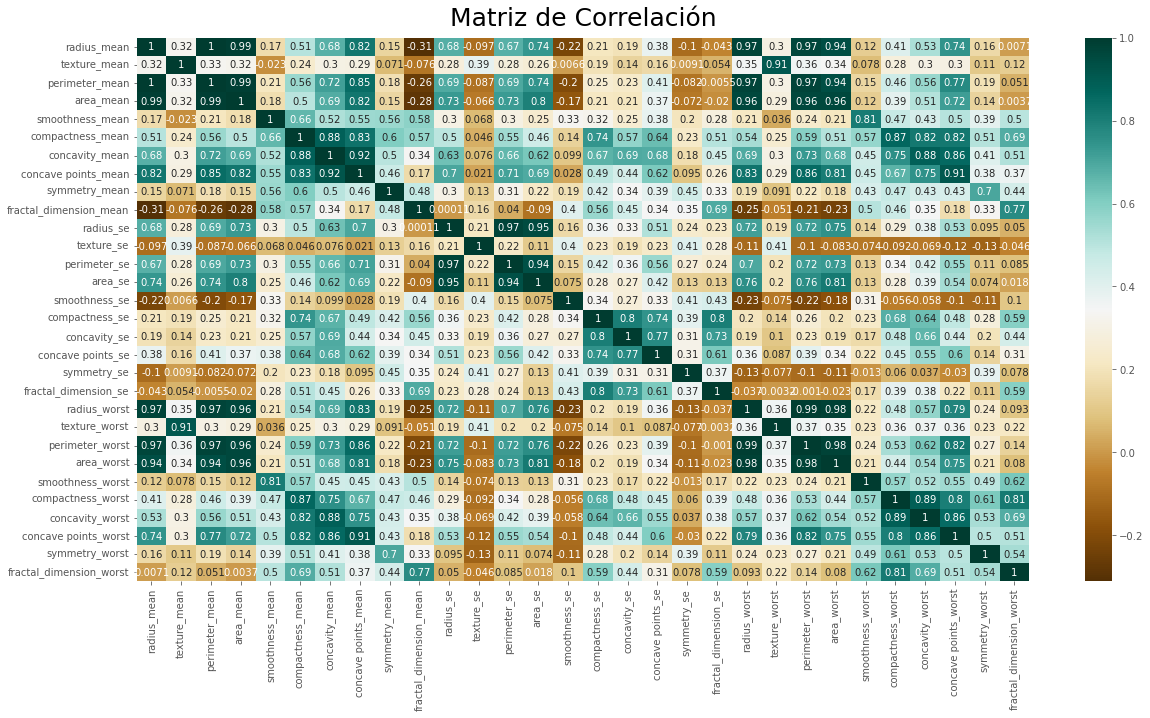

In [ ]:
# Matriz de correlación
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(),cmap='BrBG',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

## Vamos a saber cuántos valores para el tipo de cáncer maligno y benigno

In [ ]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
print ("Total número de diagnisticados ", str(df.shape[0]), ", ", df.diagnosis.value_counts()['B'], "Benigno y Maligno son",
       df.diagnosis.value_counts()['M'])

Total número de diagnisticados  569 ,  357 Benigno y Maligno son 212


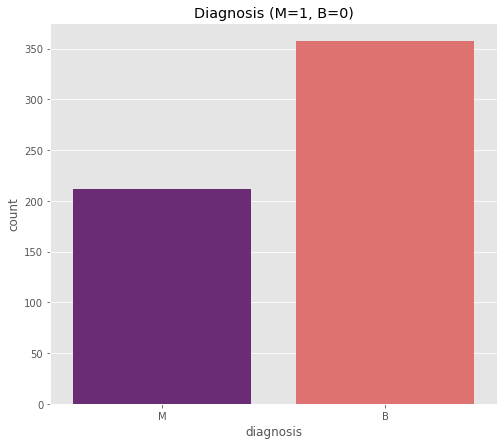

In [ ]:
#Vamos a visualizar la variable diagnosis
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='magma')
plt.title("Diagnosis (M=1, B=0)")
plt.show()

## Trazar la distribución de cada tipo de diagnóstico para algunas de las características medias.

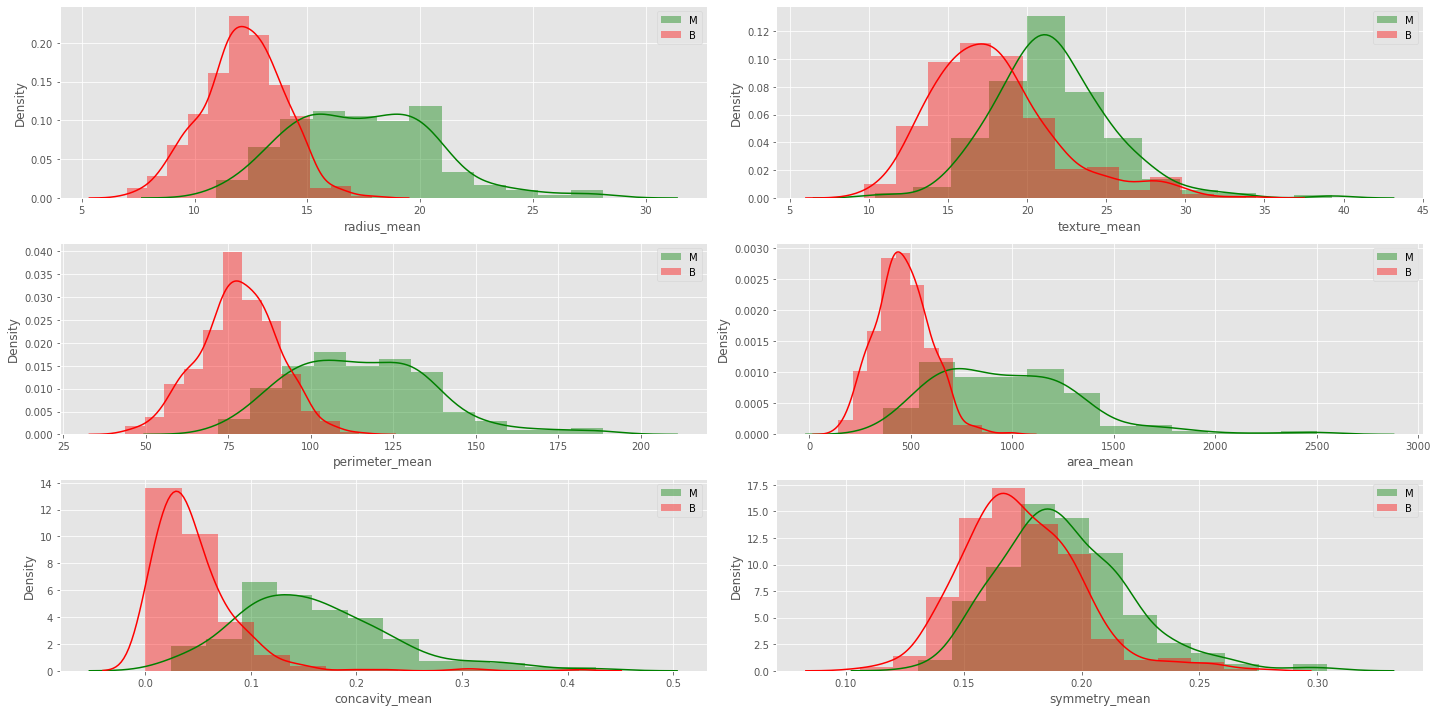

In [ ]:
#Revisemos la distribucción de las variables

bins = 12
fig, axes = plt.subplots(2,3,figsize=(20,10))
plt.subplot(3, 2, 1)
sns.distplot(df[df['diagnosis']=='M']['radius_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['radius_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
sns.distplot(df[df['diagnosis']=='M']['texture_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['texture_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
sns.distplot(df[df['diagnosis']=='M']['perimeter_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['perimeter_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 4)
sns.distplot(df[df['diagnosis']=='M']['area_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['area_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 5)
sns.distplot(df[df['diagnosis']=='M']['concavity_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['concavity_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 6)
sns.distplot(df[df['diagnosis']=='M']['symmetry_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['symmetry_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
#Convertiendo la variable categorica en numérica
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['diagnosis'] = le.fit_transform(df['diagnosis'])

El análisis de componentes principales, o PCA, es un método de reducción de dimensionalidad que se utiliza a menudo para reducir la dimensionalidad de grandes conjuntos de datos, transformando un gran conjunto de variables en uno más pequeño que aún contiene la mayor parte de la información del conjunto grande.
PCA es una herramienta muy flexible y permite el análisis de conjuntos de datos que pueden contener, por ejemplo, multicolinealidad, valores perdidos, datos categóricos y mediciones imprecisas. El objetivo es extraer la información importante de los datos y expresar esta información como un conjunto de índices resumidos llamados componentes principales.
     Entonces, en resumen, la idea de PCA es simple: reducir la cantidad de variables de un conjunto de datos, mientras se conserva la mayor cantidad de información posible.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape, x_pca.shape

((569, 31), (569, 2))

In [ ]:
pca_df = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])
pca_df

,principal component 1,principal component 2
0,9.225770,2.116196
1,2.655802,-3.784776
2,5.892492,-1.005579
3,7.135401,10.318716
4,4.129423,-1.905579
...,...,...
564,6.593983,-3.454947
565,4.024833,-3.556006
566,1.530077,-1.958871
567,10.405008,1.849078


## Visualizando el PCA

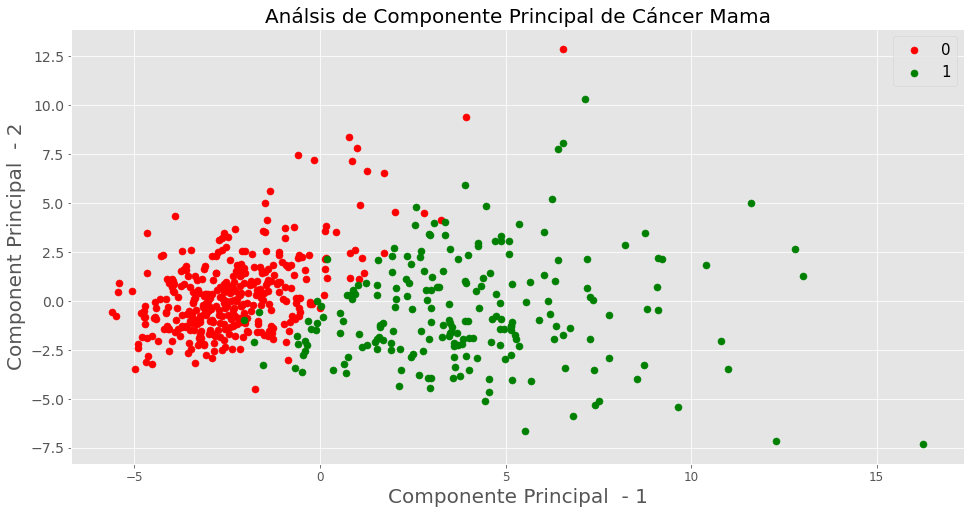

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente Principal  - 1',fontsize=20)
plt.ylabel('Component Principal  - 2',fontsize=20)
plt.title("Análsis de Componente Principal de Cáncer Mama",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['diagnosis'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})



## Dividimos los datos en etiquetas

In [ ]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [ ]:
len(X.columns)

30

## Dividimos los datos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                random_state=42)
                

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)


Shape of training set: (455, 30)
Shape of test set: (114, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

StandardScaler estandariza una función restando la media y luego escalando a la varianza de la unidad (la varianza de la unidad significa dividir todos los valores por la desviación estándar).

### 1) Logisic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

#Entrenamos al modelo
LR.fit(X_train,y_train)

#Hacemos la predicciones
Y_LR = LR.predict(X_test)

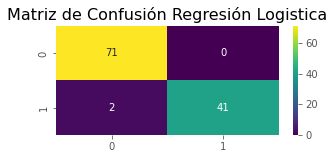

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Regresión Logistica", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_LR), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();


In [ ]:
print(classification_report(y_test, Y_LR))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import accuracy_score

logistica_acc = accuracy_score(y_test, Y_LR)
print("Precisión del Modelo de Regresión Logistica es: ", logistica_acc)

Precisión del Modelo de Regresión Logistica es:  0.9824561403508771


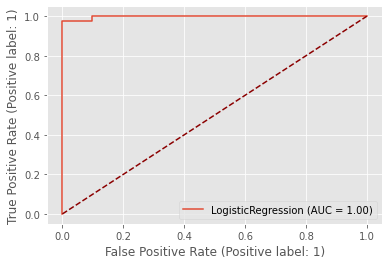

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 2)KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Encontramos lo mejors vecinos

no_of_neighbors_and_accuracies = {}
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    Y_knn = knn.predict(X_test)
    score = accuracy_score(Y_knn,y_test)
    no_of_neighbors_and_accuracies[i] = score
    


In [ ]:
no_of_neighbors_and_accuracies

{1: 0.9210526315789473,
 2: 0.9298245614035088,
 3: 0.956140350877193,
 4: 0.9385964912280702,
 5: 0.956140350877193,
 6: 0.956140350877193,
 7: 0.956140350877193,
 8: 0.956140350877193,
 9: 0.9649122807017544,
 10: 0.9385964912280702,
 11: 0.956140350877193,
 12: 0.9473684210526315,
 13: 0.956140350877193,
 14: 0.9473684210526315}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
#
Y_knn = knn.predict(X_test)

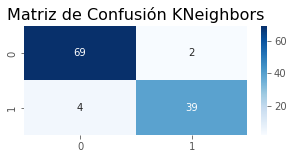

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión KNeighbors", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_knn), annot = True, cmap ='Blues',fmt = '.0f')
    
plt.show();

In [ ]:
print(classification_report(y_test, Y_knn))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
from sklearn.metrics import accuracy_score

KNN_acc = accuracy_score(y_test, Y_knn)
print("Precisión del Modelo de KNN es: ", KNN_acc)

Precisión del Modelo de KNN es:  0.9473684210526315


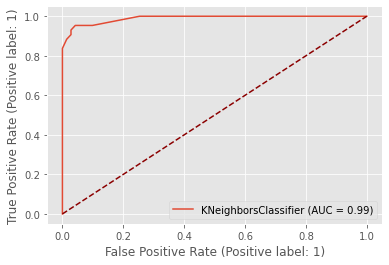

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 3)Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')
#
dtc.fit(X_train,y_train)
#
Y_dtc = dtc.predict(X_test)

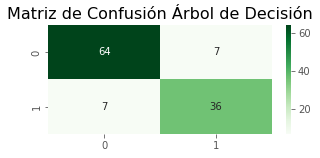

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Árbol de Decisión", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_dtc), annot = True, cmap ="Greens",fmt = '.0f')
    
plt.show();

In [ ]:
print(classification_report(y_test, Y_dtc))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        71
           1       0.84      0.84      0.84        43

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



In [ ]:
from sklearn.metrics import accuracy_score

Tree_acc = accuracy_score(y_test, Y_dtc)
print("Precisión del Modelo de Árbol de Decisión es: ", Tree_acc)

Precisión del Modelo de Árbol de Decisión es:  0.8771929824561403


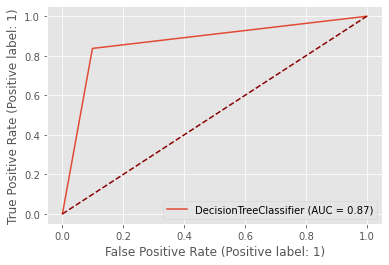

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 4)Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy')
#
rfc.fit(X_train, y_train)
#
Y_rfc = rfc.predict(X_test)

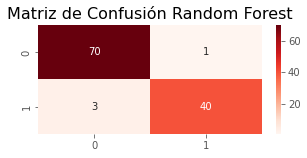

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Random Forest", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_rfc), annot = True, cmap ='Reds',fmt = '.0f')
    
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_rfc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score

Random_Forest_acc = accuracy_score(y_test, Y_rfc)
print("Precisión del Modelo de Random Forest es: ", Random_Forest_acc)

Precisión del Modelo de Random Forest es:  0.9649122807017544


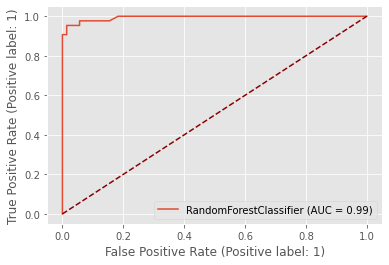

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 5)Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC()
#
svc.fit(X_train,y_train)
#
Y_svc = svc.predict(X_test)

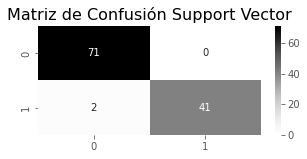

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Support Vector", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_svc), annot = True, cmap ='Greys',fmt = '.0f')
    
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, Y_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import accuracy_score

SVC_acc = accuracy_score(y_test, Y_svc)
print("Precisión del Modelo de Support Vector es: ", SVC_acc)

Precisión del Modelo de Support Vector es:  0.9824561403508771


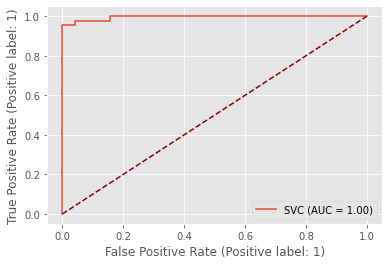

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 6)Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB  
gnb = GaussianNB() 
#
gnb.fit(X_train, y_train)
#
Y_gnb = gnb.predict(X_test)

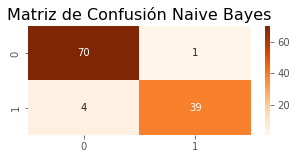

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Naive Bayes", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_gnb), annot = True, cmap ='Oranges',fmt = '.0f')
    
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, Y_gnb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score

Gaussian_acc = accuracy_score(y_test, Y_gnb)
print("Precisión del Modelo de Naive Bayes es: ", Gaussian_acc)

Precisión del Modelo de Naive Bayes es:  0.956140350877193


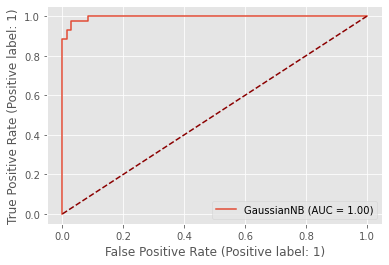

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gnb, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 7)Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
#
gbc.fit(X_train,y_train)
#
Y_gbc = gbc.predict(X_test)

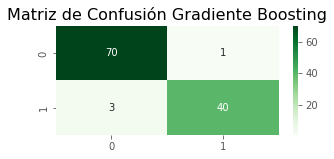

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Gradiente Boosting", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_gbc), annot = True, cmap ='Greens',fmt = '.0f')
    
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, Y_gbc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score

GradientBoosting_acc = accuracy_score(y_test, Y_gbc)
print("Precisión del Modelo de Gradient Boosting es: ", GradientBoosting_acc)

Precisión del Modelo de Gradient Boosting es:  0.9649122807017544


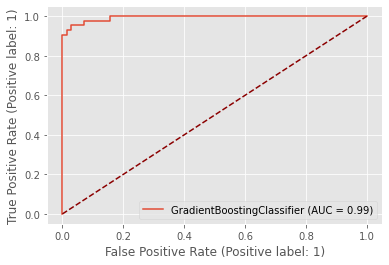

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gbc, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 8)Stochastic Gradient Decent

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
#
Y_sgdc = sgdc.fit(X_train,y_train)
#
Y_sgdc = sgdc.predict(X_test)

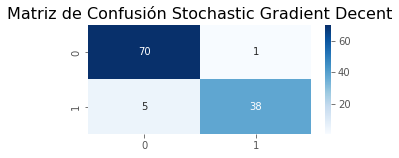

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Stochastic Gradient Decent", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_sgdc), annot = True, cmap ='Blues',fmt = '.0f')
    
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, Y_sgdc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
from sklearn.metrics import accuracy_score

StochasticGradient_acc = accuracy_score(y_test, Y_sgdc)
print("Precisión del Modelo de Stochastic Gradient Decent es: ", StochasticGradient_acc)

Precisión del Modelo de Stochastic Gradient Decent es:  0.9473684210526315


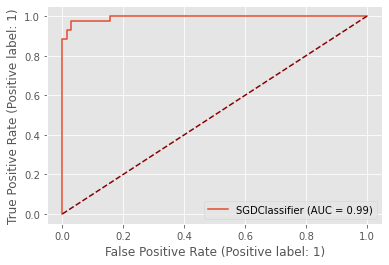

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(sgdc, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 8)AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
#
adb.fit(X_train,y_train)
#
Y_adb = adb.predict(X_test)

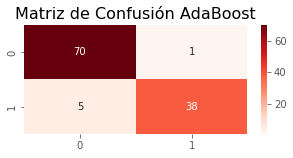

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión AdaBoost", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_sgdc), annot = True, cmap ='Reds',fmt = '.0f')
    
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, Y_adb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.metrics import accuracy_score

AdaBoost_acc = accuracy_score(y_test, Y_adb)
print("Precisión del Modelo de AdaBoost es: ", AdaBoost_acc)

Precisión del Modelo de AdaBoost es:  0.9736842105263158


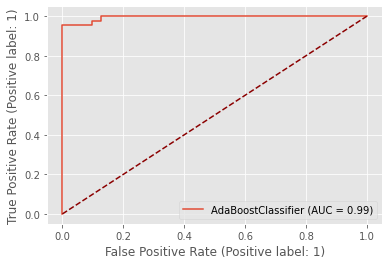

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(adb, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 9)XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
#
xgb.fit(X_train,y_train)
#
Y_xgb = xgb.predict(X_test)

[14:46:57] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


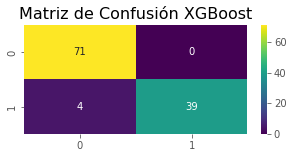

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión XGBoost", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_xgb), annot = True, cmap ='viridis',fmt = '.0f')
    
plt.show();

In [ ]:

print(classification_report(y_test, Y_xgb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score

xgboost_acc = accuracy_score(y_test, Y_xgb)
print("Precisión del Modelo de Xgboost es: ", xgboost_acc)

Precisión del Modelo de Xgboost es:  0.9649122807017544


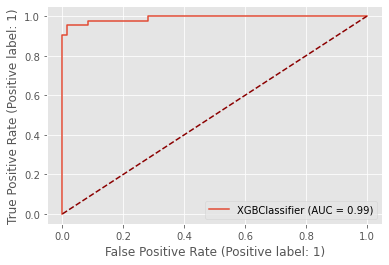

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 10)CatBoost

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
#
cb.fit(X_train,y_train)
#
Y_cb = cb.predict(X_test)

Learning rate set to 0.00736
0:	learn: 0.6812589	total: 437ms	remaining: 7m 16s
1:	learn: 0.6692348	total: 467ms	remaining: 3m 53s
2:	learn: 0.6583753	total: 505ms	remaining: 2m 47s
3:	learn: 0.6481894	total: 543ms	remaining: 2m 15s
4:	learn: 0.6375033	total: 584ms	remaining: 1m 56s
5:	learn: 0.6283885	total: 620ms	remaining: 1m 42s
6:	learn: 0.6165743	total: 654ms	remaining: 1m 32s
7:	learn: 0.6064453	total: 687ms	remaining: 1m 25s
8:	learn: 0.5955410	total: 732ms	remaining: 1m 20s
9:	learn: 0.5862461	total: 771ms	remaining: 1m 16s
10:	learn: 0.5759000	total: 815ms	remaining: 1m 13s
11:	learn: 0.5665579	total: 855ms	remaining: 1m 10s
12:	learn: 0.5565177	total: 894ms	remaining: 1m 7s
13:	learn: 0.5480506	total: 934ms	remaining: 1m 5s
14:	learn: 0.5396308	total: 981ms	remaining: 1m 4s
15:	learn: 0.5311838	total: 1.02s	remaining: 1m 2s
16:	learn: 0.5238098	total: 1.07s	remaining: 1m 2s
17:	learn: 0.5156037	total: 1.11s	remaining: 1m
18:	learn: 0.5084232	total: 1.14s	remaining: 58.9s
19:

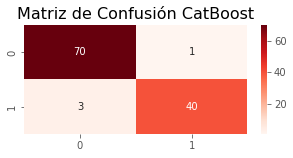

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión CatBoost", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_cb), annot = True, cmap ='Reds',fmt = '.0f')
    
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, Y_cb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score

CatBoost_acc = accuracy_score(y_test, Y_cb)
print("Precisión del Modelo de CatBoost es: ", CatBoost_acc)

Precisión del Modelo de CatBoost es:  0.9649122807017544


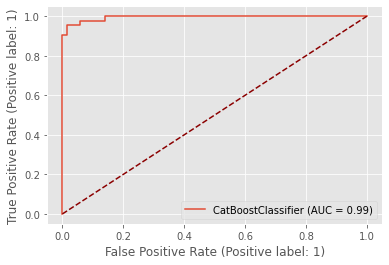

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cb, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 11)Light GBM

In [ ]:
from lightgbm import LGBMClassifier
#
lg = LGBMClassifier()
#
lg.fit(X_train,y_train)
#
Y_lg = lg.predict(X_test)

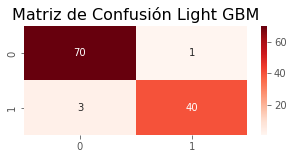

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Light GBM", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_lg), annot = True, cmap ='Reds',fmt = '.0f')
    
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, Y_lg))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score

LGBM_acc = accuracy_score(y_test, Y_lg)
print("Precisión del Modelo de Light GBM es: ", LGBM_acc)

Precisión del Modelo de Light GBM es:  0.9649122807017544


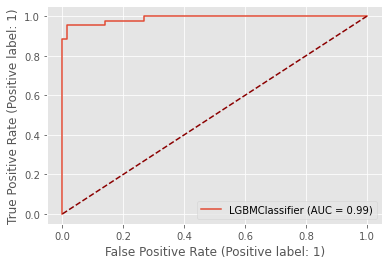

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lg, X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

### 12) ARTIFICIAL NEURAL NETWORKS (ANN)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout


#CREATING THE ANN AS SEQUENCE OF LAYERS
ann = tf.keras.models.Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(tf.keras.layers.Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

#ADDING 2ND HIDDEN LAYER WITH 30 NEURONS
ann.add(tf.keras.layers.Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))

#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor = 'accuracy', mode = 'max',patience = 25)

In [ ]:
#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
ann.fit(X_train, y_train,batch_size = 32, epochs = 400,callbacks = [early])

Epoch 1/400
15/15 [==============================] - 4s 6ms/step - loss: 0.8013 - accuracy: 0.5473
Epoch 2/400
15/15 [==============================] - 0s 5ms/step - loss: 0.6297 - accuracy: 0.6264
Epoch 3/400
15/15 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.7407
Epoch 4/400
15/15 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7934
Epoch 5/400
15/15 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.8747
Epoch 6/400
15/15 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8484
Epoch 7/400
15/15 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8725
Epoch 8/400
15/15 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.9033
Epoch 9/400
15/15 [==============================] - 0s 5ms/step - loss: 0.2781 - accuracy: 0.9011
Epoch 10/400
15/15 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.9165
Epoch 11/

<AxesSubplot:>

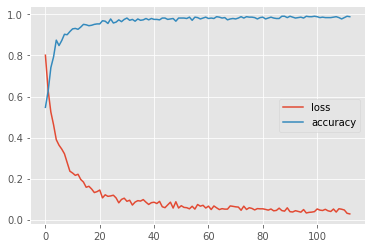

In [ ]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [ ]:
#GETTING ACCURACY AND CONFUSION MATRIX
from sklearn.metrics import confusion_matrix,accuracy_score
Y_ann = ann.predict(X_test)
Y_ann  = Y_ann > 0.5

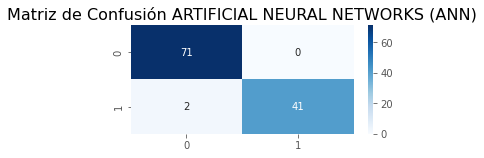

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión ARTIFICIAL NEURAL NETWORKS (ANN)", fontsize=16)
sns.heatmap(confusion_matrix(y_test, Y_ann), annot = True, cmap ='Blues',fmt = '.0f')
    
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, Y_ann))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import accuracy_score

ANN_acc = accuracy_score(y_test, Y_ann)
print("Precisión del Modelo de ARTIFICIAL NEURAL NETWORKS es: ", ANN_acc)

Precisión del Modelo de ARTIFICIAL NEURAL NETWORKS es:  0.9824561403508771


## Resultados

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Decision Tree','Random Forest','Support Vector Machines',
              'Naive Bayes','Gradient Boosting','Stochastic gradient decent',
              'AdaBoost','XGboost','Catboost','LightGBM',"Neural"],
    'Accuracy': [logistica_acc, KNN_acc, Tree_acc,Random_Forest_acc, SVC_acc, Gaussian_acc, GradientBoosting_acc, 
              StochasticGradient_acc,  AdaBoost_acc, xgboost_acc, CatBoost_acc, LGBM_acc,ANN_acc]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,0.982456
4,Support Vector Machines,0.982456
12,Neural,0.982456
8,AdaBoost,0.973684
3,Random Forest,0.964912
6,Gradient Boosting,0.964912
9,XGboost,0.964912
10,Catboost,0.964912
11,LightGBM,0.964912
5,Naive Bayes,0.956140


### Visualización de los resultados

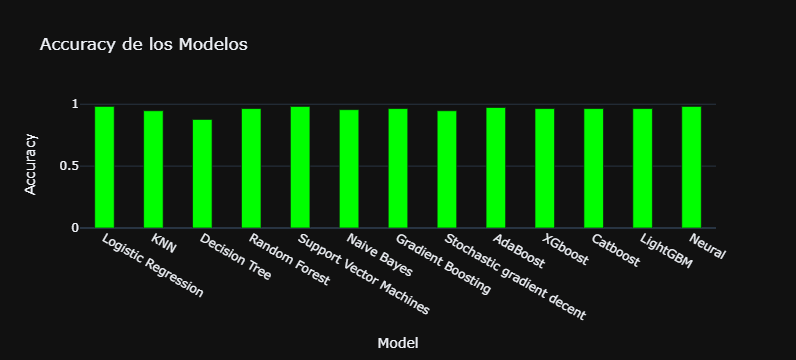

In [ ]:
import plotly.express as px
fig = px.bar (models, x="Model", 
                   y="Accuracy", 
                       template = "plotly_dark",
                   color_discrete_sequence=['lime', 'blue'], 
                   title='Accuracy de los Modelos')
fig.update_layout(bargap=0.6)
fig.show()

<AxesSubplot:>

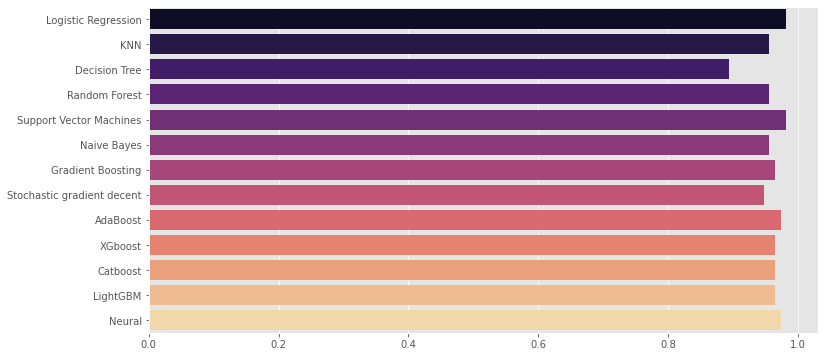

In [ ]:
plt.figure(figsize=(12,6))
model_acc = [logistica_acc, KNN_acc, Tree_acc,Random_Forest_acc, SVC_acc, Gaussian_acc, GradientBoosting_acc, 
              StochasticGradient_acc,  AdaBoost_acc, xgboost_acc, CatBoost_acc, LGBM_acc,ANN_acc]
model_name = ['Logistic Regression','KNN','Decision Tree','Random Forest','Support Vector Machines',
              'Naive Bayes','Gradient Boosting','Stochastic gradient decent',
              'AdaBoost','XGboost','Catboost','LightGBM',"Neural"]
sns.barplot(x= model_acc, y=model_name, palette='magma')

## **Predicciones**

In [ ]:
paciente= pd.DataFrame({"num1":[17.98, 10.38, 122.80, 1001.0, 0.11840 ,0.27760,
            0.3001, 0.14710, 0.2419, 0.07871, 1.0950, 0.9053, 8.589, 153.40, 0.006399, 0.04904,
            0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119,
            0.2654, 0.4601, 0.11890]})
paciente

,num1
0,17.980000
1,10.380000
2,122.800000
3,1001.000000
4,0.118400
5,0.277600
6,0.300100
7,0.147100
8,0.241900
9,0.078710


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
paci=ss.fit_transform(paciente.T)

In [ ]:
svc.predict(paci )

array([0])

El paciente es Benigno